<a href="https://colab.research.google.com/github/SusmithaSantosh/DataScienceProjects/blob/main/MV_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMBD Review Using Deep Learning:

1. EDA
2. Visuvalizing text by - WordCloud
4. NLP 
5. Building Logistic Regression model and Naive Bayes Classification
6. Building CNN Model usinng Tensor Flow, Keras.
7. Finally, Reviewing IMBD Movie Review.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import textblob
import sklearn
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
df=pd.read_csv("/content/drive/MyDrive/DataScienceResumeProjects/Twitter_Sentiment_Analysis/IMDB Dataset.csv")
df.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [70]:
df.iloc[0].review

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [71]:
df.iloc[3].review

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [72]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [73]:
df.shape

(50000, 2)

In [74]:
df.sentiment.value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

In [75]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [76]:
df.isna().sum()

review       0
sentiment    0
dtype: int64

# Data Preprocessing



# Converting all reviews to lower case

In [77]:
df.review=df.review.str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


## Replacing Special Characters with Space

In [78]:
df.review=df.review.str.replace('<[^<]+?>','')
df.head()

<ipython-input-78-5a3e2a5fa872>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.review=df.review.str.replace('<[^<]+?>','')


,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# Replacing Regex Values with Space

In [79]:
df["review"] = df['review'].str.replace('[^\w\s]','')

<ipython-input-79-5cff30bcaae0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"] = df['review'].str.replace('[^\w\s]','')


In [80]:
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


# Checking the clean data

In [81]:
df.review[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with methe first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordit is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awayi would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare forget pretty pictur

# Splitting and Obtaining the words from the reviews coloumn

In [82]:
df1 = df['review'].str.split()

In [83]:
df1.head()

0    [one, of, the, other, reviewers, has, mentione...
1    [a, wonderful, little, production, the, filmin...
2    [i, thought, this, was, a, wonderful, way, to,...
3    [basically, theres, a, family, where, a, littl...
4    [petter, matteis, love, in, the, time, of, mon...
Name: review, dtype: object

# Adding the negative sentiment in Negative Coloumn

In [84]:
df_negative=df[df.sentiment=='negative']
df_negative.head()

,review,sentiment
3,basically theres a family where a little boy j...,negative
7,this show was an amazing fresh innovative ide...,negative
8,encouraged by the positive comments about this...,negative
10,phil the alien is one of those quirky films wh...,negative
11,i saw this movie when i was about 12 when it c...,negative


# Showing the data with positive sentiment

In [85]:
df_positive=df[df.sentiment=='positive']
df_positive.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
4,petter matteis love in the time of money is a ...,positive
5,probably my alltime favorite movie a story of ...,positive


# Generating a positive words cloud

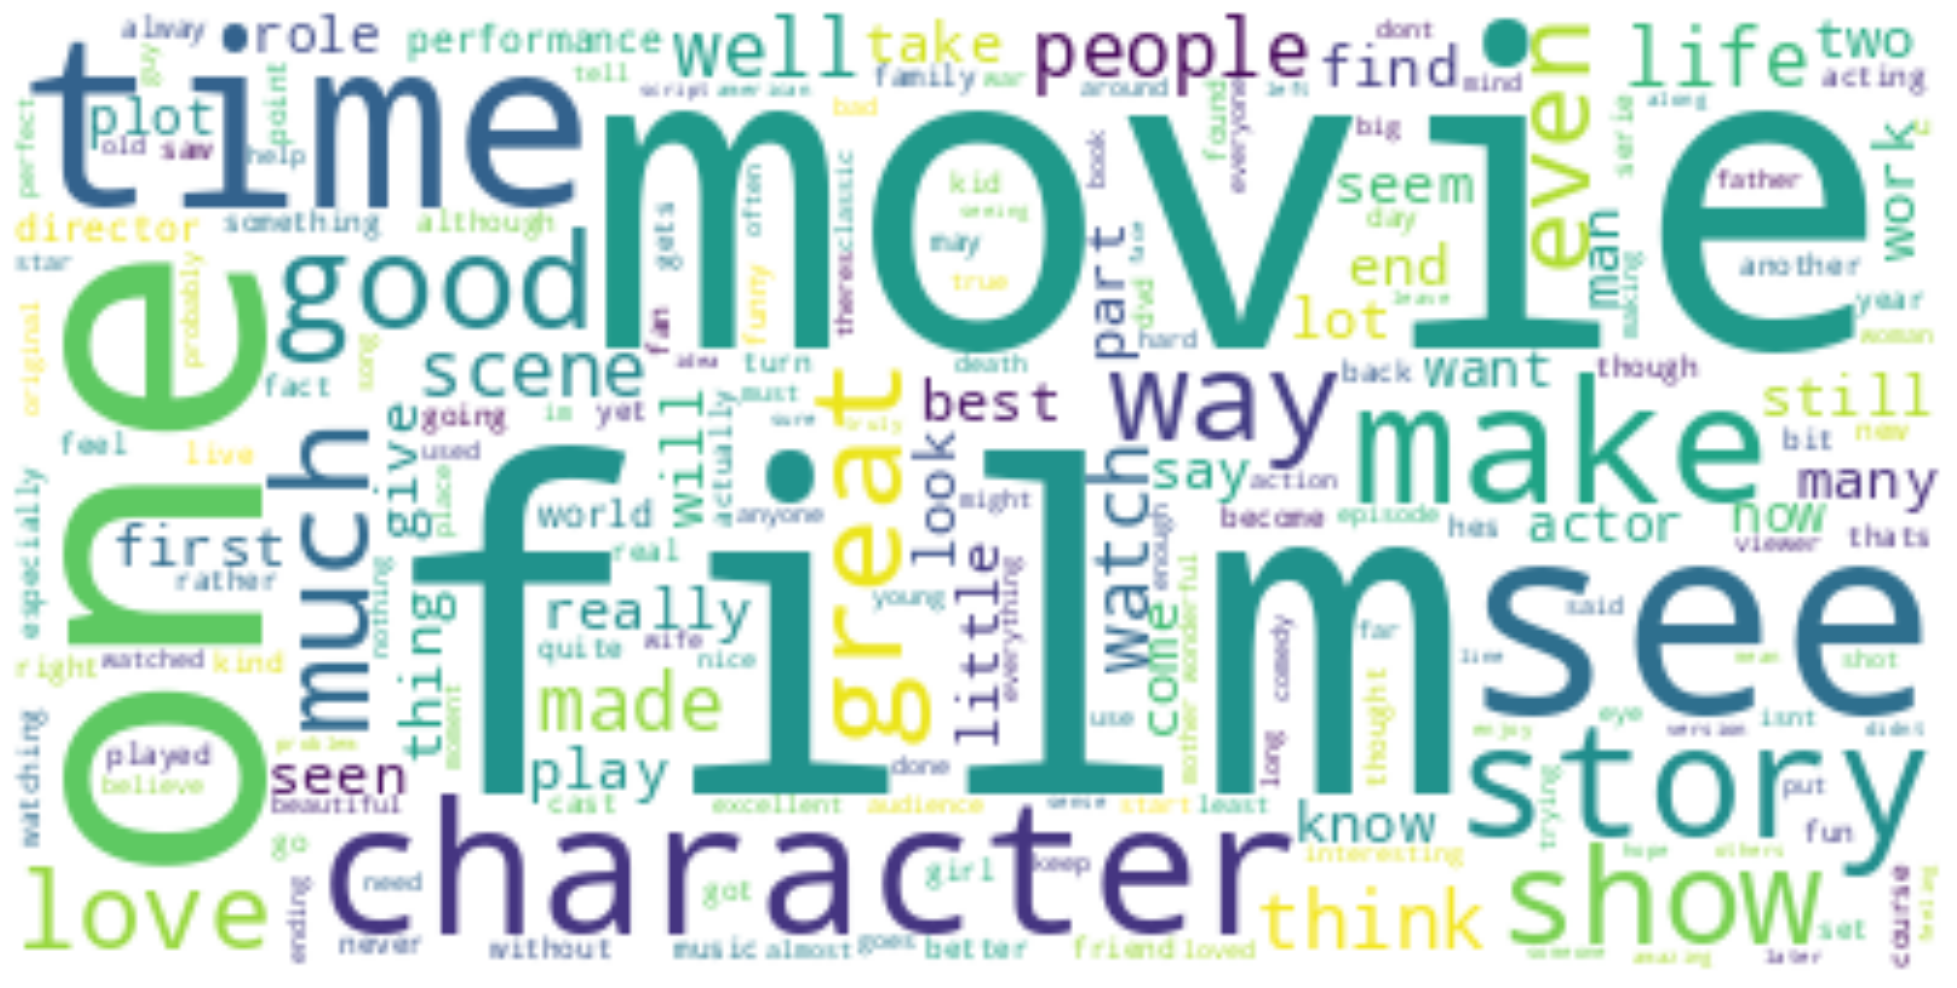

In [86]:
text_positive= " ".join(i for i in df_positive.review)
stopwords = set(STOPWORDS)
wordcloud_positive = WordCloud(stopwords=stopwords, background_color="white").generate(text_positive)
plt.figure( figsize=(25,20))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

# Generating a negative words cloud

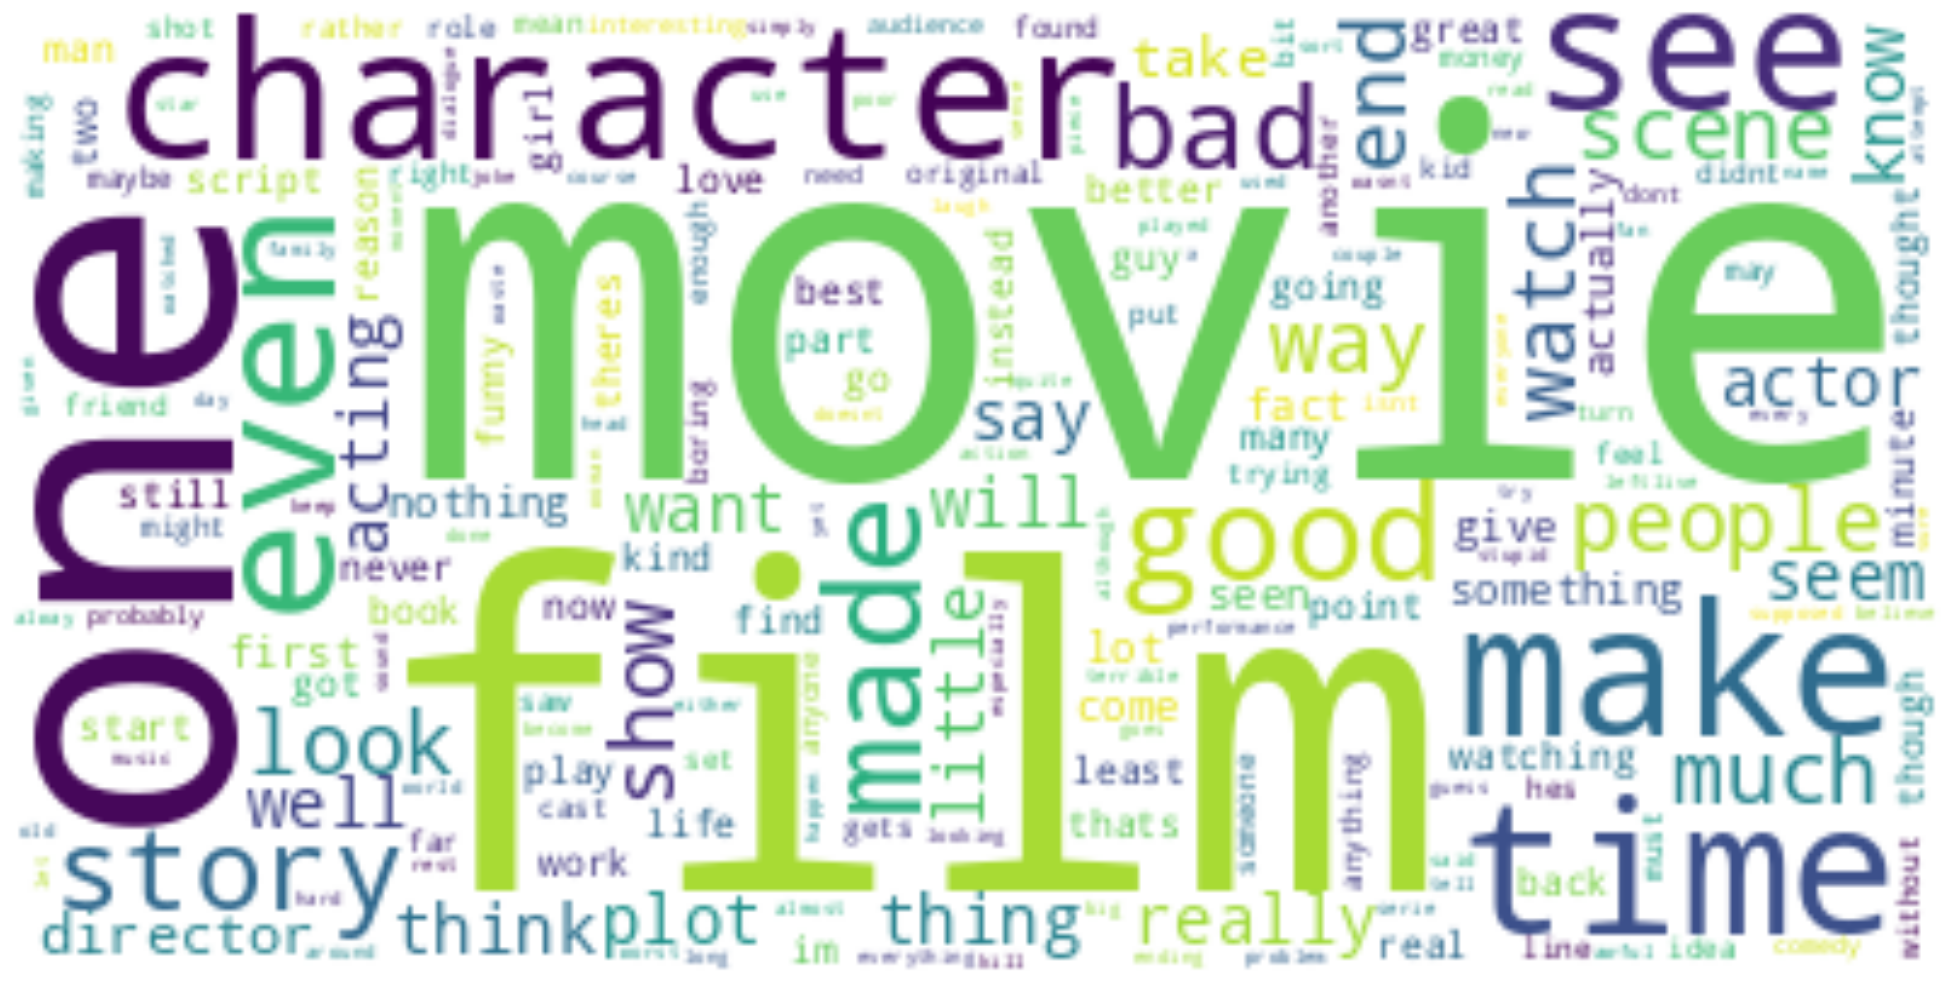

In [87]:
text_negative= " ".join(i for i in df_negative.review)
stopwords = set(STOPWORDS)
wordcloud_negative = WordCloud(stopwords=stopwords, background_color="white").generate(text_negative)
plt.figure( figsize=(25,20))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

# Importing Porter Stemmer

In [88]:
ps=PorterStemmer()

In [89]:
def stem(text):
    L=[]
    for i in text.split():
        L.append(ps.stem(i))
        
        
    string=" ".join(L)    
    return string

In [90]:
df.review=df.review.apply(stem)

In [91]:
df['sentiment']=df['sentiment'].apply(lambda x: 1 if x=='positive' else 0)

In [92]:
df.head(10)

,review,sentiment
0,one of the other review ha mention that after ...,1
1,a wonder littl product the film techniqu is ve...,1
2,i thought thi wa a wonder way to spend time on...,1
3,basic there a famili where a littl boy jake th...,0
4,petter mattei love in the time of money is a v...,1
5,probabl my alltim favorit movi a stori of self...,1
6,i sure would like to see a resurrect of a up d...,1
7,thi show wa an amaz fresh innov idea in the 70...,0
8,encourag by the posit comment about thi film o...,0
9,if you like origin gut wrench laughter you wil...,1


# Generating a Sparse Vector from the reviews

In [93]:
tfd=TfidfVectorizer(ngram_range=(1,3),max_features=5000)

In [94]:
vector=tfd.fit_transform(df.review)

In [95]:
vector1=vector.toarray()
vector1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [96]:
vector.shape

(50000, 5000)

# Splitting the Data

In [97]:
X_train=vector[0:40000]
Y_train=df.sentiment[0:40000]
X_test=vector[40000:]
Y_test=df.sentiment[40000:]

# Performing Logistic Regression

The accuracy of the model is:  88.72
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      4993
           1       0.89      0.89      0.89      5007

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



<Axes: >

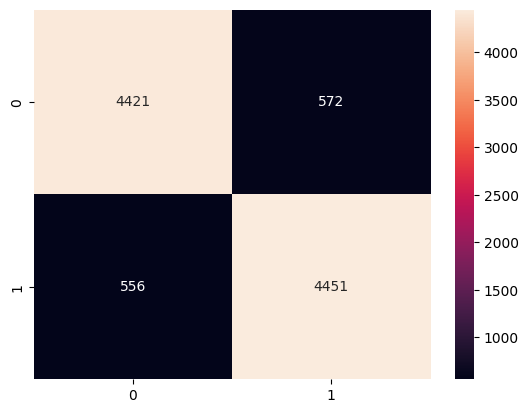

In [98]:
model_lr=LogisticRegression()
model_lr.fit(X_train,Y_train)
print("The accuracy of the model is: ", model_lr.score(X_test,Y_test)*100)
predictions_lr=model_lr.predict(X_test)
print(classification_report(Y_test,predictions_lr))
cm=confusion_matrix(Y_test,predictions_lr)
sns.heatmap(cm,annot=True,fmt='d')

# Implementing naive bayes

In [99]:
#importing naive bayes
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score

In [100]:
#We will train a Naive bayes classifier
clf = naive_bayes.MultinomialNB()
clf.fit(X_train, Y_train)

MultinomialNB()

The accuracy of the model is:  85.13
              precision    recall  f1-score   support

           0       0.86      0.84      0.85      4993
           1       0.84      0.86      0.85      5007

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



<Axes: >

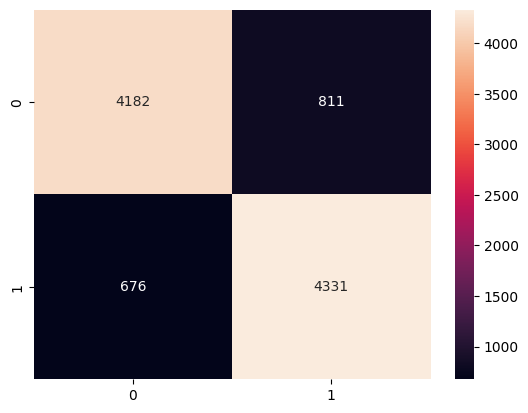

In [101]:
print("The accuracy of the model is: ", clf.score(X_test,Y_test)*100)
predictions_nb=clf.predict(X_test)
print(classification_report(Y_test,predictions_nb))
cm=confusion_matrix(Y_test,predictions_nb)
sns.heatmap(cm,annot=True,fmt='d')

# Bulding a CNN model

# Importing Tensorflow libraries

In [102]:
from tensorflow import keras

In [103]:
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Doing Basic Preprocessing

In [105]:
X = df.review
Y = df.sentiment
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

In [106]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.15)

In [107]:
from keras.utils import pad_sequences

In [108]:
max_words = 1000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = keras.utils.pad_sequences(sequences,maxlen=max_len)

# Creating the size of the network and the output size of the LSTM

In [109]:
max_features = 20000
maxlen = 100
embedding_size = 128
# Convolution
kernel_size = 5
filters = 64
pool_size = 4
# LSTM
lstm_output_size = 70
# Training
batch_size = 100
epochs = 5

# Creating a MaxPoolingLayer Neural network for LSTM

In [110]:
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

#score, acc = model.evaluate(test_sequences_matrix,Y_test, batch_size=batch_size)
#print('Test score:', score)
#print('Test accuracy:', acc)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 128)          2560000   
                                                                 
 dropout_1 (Dropout)         (None, 100, 128)          0         
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 64)            41024     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 24, 64)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 70)                37800     
                                                                 
 dense_1 (Dense)             (None, 1)                 71        
                                                      

# Fitting the Model

In [ ]:
model.fit(sequences_matrix,Y_train,
          batch_size=batch_size,
          epochs=epochs)

Epoch 1/5
425/425 [==============================] - 74s 168ms/step - loss: 0.4153 - accuracy: 0.8010
Epoch 2/5
425/425 [==============================] - 71s 168ms/step - loss: 0.3356 - accuracy: 0.8512
Epoch 3/5
425/425 [==============================] - 73s 173ms/step - loss: 0.3029 - accuracy: 0.8697
Epoch 4/5
285/425 [===================>..........] - ETA: 24s - loss: 0.2714 - accuracy: 0.8856

In [ ]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = keras.utils.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,Y_test)

# Final Accuracy and Loss Calculation

In [ ]:
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))